In [1]:
import numpy as np
import pandas as pd

In [2]:
temp_df = pd.read_csv('/content/bbc_data.csv')

In [3]:
temp_df

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


In [10]:
temp_df.shape

(2225, 2)

In [4]:
temp_df['data'][1]

'U2s desire to be number one  U2, who have won three prestigious Grammy Awards for their hit Vertigo, are stubbornly clinging to their status as one of the biggest bands in the world.  The most popular groups in the history of rock all have several things in common. The music must be inspired and appeal across generations and be distinctive, if not always groundbreaking. But such success is down to more than music. They have to be compelling performers, charismatic and intelligent enough to make good decisions and keep their feet on the ground. They also have to want it. They have to want to be the biggest band ever and not stop wanting it. The Beatles had it, the Rolling Stones still have it, REM hold onto it and Queen were it in a catsuit. And U2 have it in spades, and keep churning it out. Their new album, How To Dismantle An Atomic Bomb, comes 28 years after the schoolfriends got together in Dublin and 17 years after The Joshua Tree cemented their place on the all-time rock A-list.

In [7]:
temp_df['labels'].value_counts()

,count
labels,
sport,511
business,510
politics,417
tech,401
entertainment,386


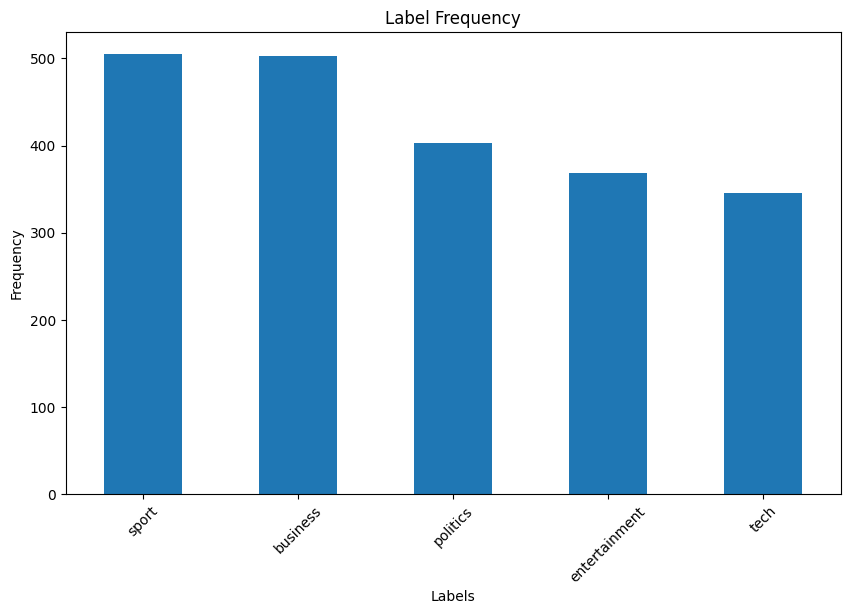

In [15]:
import matplotlib.pyplot as plt

# Get the value counts of the 'labels' column
label_counts = temp_df['labels'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Frequency')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [8]:
temp_df.isnull().sum()

,0
data,0
labels,0


In [9]:
temp_df.duplicated().sum()

99

In [12]:
temp_df.drop_duplicates(inplace=True)

In [14]:
temp_df.duplicated().sum()

0

In [16]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text


In [18]:
temp_df["data"] = temp_df['data'].apply(remove_tags)

In [20]:
temp_df["data"][0]

'Musicians to tackle US red tape  Musicians groups are to tackle US visa regulations which are blamed for hindering British acts chances of succeeding across the Atlantic.  A singer hoping to perform in the US can expect to pay $1,300 (xc2xa3680) simply for obtaining a visa. Groups including the Musicians Union are calling for an end to the "raw deal" faced by British performers. US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.  Nigel McCune from the Musicians Union said British musicians are "disadvantaged" compared to their US counterparts. A sponsor has to make a petition on their behalf, which is a form amounting to nearly 30 pages, while musicians face tougher regulations than athletes and journalists. "If you make a mistake on your form, you risk a five-year ban and thus the ability to further your career," says Mr McCune.  "The US is the worlds biggest music market, which means something has to be done about the creaky 

In [22]:
temp_df['data'] = temp_df['data'].apply(lambda x:x.lower())

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
from nltk.corpus import stopwords

# Get the list of stopwords in English
sw_list = stopwords.words('english')

# Remove stopwords from the 'data' column
temp_df['data'] = temp_df['data'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x: " ".join(x))


In [27]:
temp_df

,data,labels
0,musicians tackle us red tape musicians groups ...,entertainment
1,"u2s desire number one u2, three prestigious gr...",entertainment
2,rocker doherty on-stage fight rock singer pete...,entertainment
3,snicket tops us box office chart film adaptati...,entertainment
4,"oceans twelve raids box office oceans twelve, ...",entertainment
...,...,...
2220,warning windows word files writing microsoft w...,tech
2221,fast lifts rise record books two high-speed li...,tech
2222,nintendo adds media playing ds nintendo releas...,tech
2223,fast moving phone viruses appear security firm...,tech


In [28]:
X = temp_df.iloc[:,0:1]
y = temp_df['labels']

In [29]:
X

,data
0,musicians tackle us red tape musicians groups ...
1,"u2s desire number one u2, three prestigious gr..."
2,rocker doherty on-stage fight rock singer pete...
3,snicket tops us box office chart film adaptati...
4,"oceans twelve raids box office oceans twelve, ..."
...,...
2220,warning windows word files writing microsoft w...
2221,fast lifts rise record books two high-speed li...
2222,nintendo adds media playing ds nintendo releas...
2223,fast moving phone viruses appear security firm...


In [32]:
y

,labels
0,entertainment
1,entertainment
2,entertainment
3,entertainment
4,entertainment
...,...
2220,tech
2221,tech
2222,tech
2223,tech


In [34]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is your label column (e.g., 'labels' column in your DataFrame)
encoder = LabelEncoder()

# Fit and transform the labels into numerical values
y = encoder.fit_transform(temp_df['labels'])

# Now 'y' will contain the encoded labels as integers
print(y)

# To see the mapping of the original labels to the encoded values:
print(encoder.classes_)

[1 1 1 ... 4 4 4]
['business' 'entertainment' 'politics' 'sport' 'tech']


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
X_train.shape

(1700, 1)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer()

In [39]:
X_train_bow = cv.fit_transform(X_train['data']).toarray()
X_test_bow = cv.transform(X_test['data']).toarray()

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [41]:
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9248826291079812

In [42]:
confusion_matrix(y_test,y_pred)

array([[ 87,   1,   6,   1,   6],
       [  1,  63,   0,   0,   4],
       [  3,   1,  77,   0,   0],
       [  3,   1,   0, 103,   0],
       [  1,   2,   2,   0,  64]])

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.9694835680751174

In [45]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['data']).toarray()
X_test_bow = cv.transform(X_test['data']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.971830985915493

In [46]:
confusion_matrix(y_test,y_pred)

array([[ 97,   0,   3,   0,   1],
       [  1,  65,   1,   1,   0],
       [  1,   0,  79,   1,   0],
       [  0,   0,   0, 107,   0],
       [  2,   1,   0,   0,  66]])

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

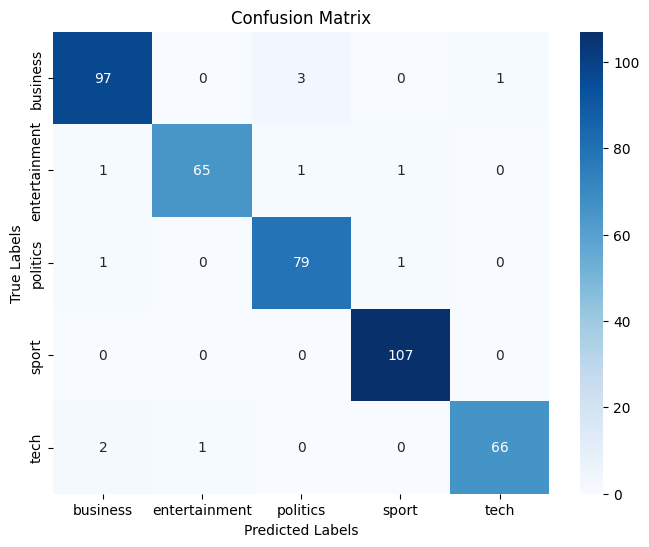

In [48]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer()

In [52]:
X_train_tfidf = tfidf.fit_transform(X_train['data']).toarray()
X_test_tfidf = tfidf.transform(X_test['data'])

In [58]:
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

In [53]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.9671361502347418

In [56]:
import pickle

In [57]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

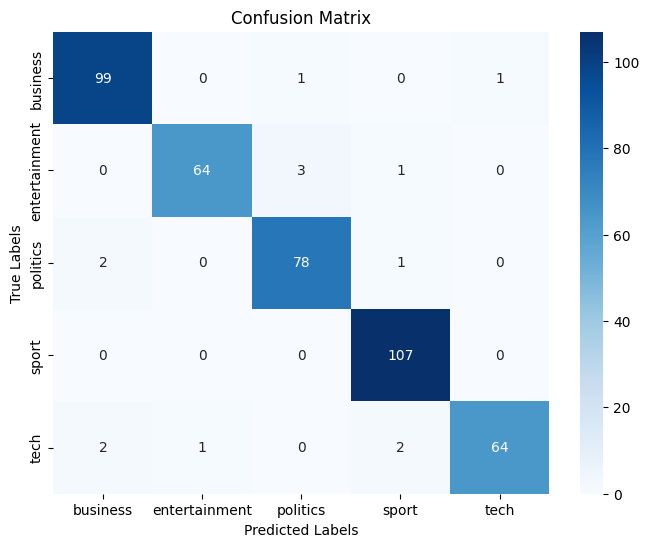

In [54]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()